# Projeto 1 - Ciência dos Dados

Nome: Felipe Catapano

Nome: Rafael Eli Katri

Nome: Natan Kron Goldenberg Lewi

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
import os

In [ ]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [2]:
filename = 'Minecraft.xlsx'

In [3]:
train = pd.read_excel(filename)
train = train.loc[:,['Treinamento','Rafa','Classificação']]
train.columns = ['Tweet','Integrante','Classificação']
train.head(5)

,Tweet,Integrante,Classificação
0,partiu jogar ❤️\n\n#minecraft,Rafa,2
1,"@guilovespink ah sim, eu tenho meu projetinho ...",Rafa,3
2,agr vai ser tudo na base do mais profundo ódio...,Rafa,0
3,@vinimonteuro @azulgreatcat minecraft comes al...,Rafa,0
4,vou fazer casinha no minecraft\n\nalguem tem x...,Rafa,2


In [4]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test = test.loc[:,['Teste','Unnamed: 14','Classificador']]
test.columns = ['Tweet','Integrante','Classificação']
test.head(5)

,Tweet,Integrante,Classificação
0,agr. ta indo. minecraft. se. ela. apaga meu m...,Natan,1
1,"@cups_gu pra mim o melhor jogo é minecraft, ma...",Natan,1
2,@junnotfound_ @alguem_aitlgd @mineperfeito ele...,Natan,2
3,eu passei o dia inteiro jogando minecraft jss ...,Natan,3
4,lol ache uma partida rapido se nn vou ficar a ...,Natan,1


___
## Classificador automático de sentimento


O produto escolhido foi o videojogo Minecraft, desenvolvido pela empresa Mojang. Escolhemos esse jogo devido ao alto volume de tweets que ele movimenta, graças à forte comunidade que o sustenta.
Classificamos os tweets entre 4 graus de classificação, em ordem crescente de relevância:
- O primeiro (0) seria de tweets que não são coesos e não possuem relevância ao jogo.
- O próximo (1) é composto de tweets que não tem foco no Minecraft, mas o jogo tem certa relevância no texto.
- O nível 2 é formado por tweets cujo principal tema é Minecraft, mas não entra em termos técnicos do jogo.
- Por fim, o nível 3 é formado de tweets centrados em Minecraft, os quais descrevem aspectos técnicos do jogo.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [5]:
# Transforma o texto dos tweets em minúsculo para padronizar palavras idênticas que tenham variação nesse quesito:

train["Tweet"].str.lower()
test["Tweet"].str.lower()

# Separa o texto de cada tweet em palavras:

lista = list()
for el in train["Tweet"]:
    # Tira espaços extras
    limpando = " ".join(el.split())
    words = limpando.split()
    lista.append(words)
train["Palavras"] = lista

lista = list()
for el in test["Tweet"]:
    # Tira espaços extras
    limpando = " ".join(el.split())
    words = limpando.split()
    lista.append(words)
test["Palavras"] = lista

# Filtra caracteres especiais e stopwords:

charstop = ['?','!','.',',','(',')','[',']','{','}','<','>','-',':','|','┃']

palavrastop = ['a','o','as','os','umas','uns','eu','voce','pra','ele','ela','elas','eles','agnt','um','do','de','da','das','dos','e','na','no','em','meu','para','pela','pelo','que','q']

lista = list()
for el in train['Palavras']:
    liste = []
    for x in el:
        if any(char in charstop for char in x):
            for stp in charstop:
                x = x.replace(stp,"")
        if x != "" and (x not in palavrastop and x not in stopwords.words('portuguese')):
            liste.append(x)
    lista.append(liste)
train['Filtrado'] = lista

lista = list()
for el in test['Palavras']:
    liste = []
    for x in el:
        if any(char in charstop for char in x):
            for stp in charstop:
                x = x.replace(stp,"")
        if x != "" and (x not in palavrastop and x not in stopwords.words('portuguese')):
            liste.append(x)
    lista.append(liste)
test['Filtrado'] = lista

train

,Tweet,Integrante,Classificação,Palavras,Filtrado
0,partiu jogar ❤️\n\n#minecraft,Rafa,2,"[partiu, jogar, ❤️, #minecraft]","[partiu, jogar, ❤️, #minecraft]"
1,"@guilovespink ah sim, eu tenho meu projetinho ...",Rafa,3,"[@guilovespink, ah, sim,, eu, tenho, meu, proj...","[@guilovespink, ah, sim, projetinho, modpack, ..."
2,agr vai ser tudo na base do mais profundo ódio...,Rafa,0,"[agr, vai, ser, tudo, na, base, do, mais, prof...","[agr, vai, ser, tudo, base, profundo, ódio, nu..."
3,@vinimonteuro @azulgreatcat minecraft comes al...,Rafa,0,"[@vinimonteuro, @azulgreatcat, minecraft, come...","[@vinimonteuro, @azulgreatcat, minecraft, come..."
4,vou fazer casinha no minecraft\n\nalguem tem x...,Rafa,2,"[vou, fazer, casinha, no, minecraft, alguem, t...","[vou, fazer, casinha, minecraft, alguem, xbox,..."
...,...,...,...,...,...
445,essa é pra voce sonysta que gosta de vendinhas...,Natan,3,"[essa, é, pra, voce, sonysta, que, gosta, de, ...","[sonysta, gosta, vendinhas, saiba, jogo, conso..."
446,q odio eu tive insônia hj… por culpa de minecraft,Natan,0,"[q, odio, eu, tive, insônia, hj…, por, culpa, ...","[odio, insônia, hj…, culpa, minecraft]"
447,@edit_by_fresh bom dia p quem foi hackeado no ...,Natan,2,"[@edit_by_fresh, bom, dia, p, quem, foi, hacke...","[@edit_by_fresh, bom, dia, p, hackeado, minecr..."
448,“só disse isso pra tu olhar o twitter dnv” dis...,Natan,0,"[“só, disse, isso, pra, tu, olhar, o, twitter,...","[“só, disse, olhar, twitter, dnv”, disse, feli..."


In [6]:
# Stemming: retirar sufixos para se aproximar da raíz da palavra

# Inicializando objeto de stemming do nltk
stemmer = nltk.stem.RSLPStemmer()

lista = []
for el in train['Filtrado']:
    liste = []
    for x in el:
        # aplicando o stemming
        novo = stemmer.stem(x)
        liste.append(novo)
    lista.append(liste)
train['Stemming'] = lista

lista = []
for el in test['Filtrado']:
    liste = []
    for x in el:
        # aplicando o stemming
        novo = stemmer.stem(x)
        liste.append(novo)
    lista.append(liste)
test['Stemming'] = lista

train['Stemming']

0                            [part, jog, ❤️, #minecraft]
1      [@guilovespink, ah, sim, projet, modpack, tbm,...
2      [agr, vai, ser, tud, bas, profund, ódi, nunc, ...
3      [@vinimonteur, @azulgreatcat, minecraft, com, ...
4      [vou, faz, cas, minecraft, algu, xbox, minecraft]
                             ...                        
445    [sonyst, gost, vend, saib, jog, consol, vend, ...
446                   [odi, insôn, hj…, culp, minecraft]
447    [@edit_by_fresh, bom, dia, p, hacke, minecraft...
448    [“só, diss, olh, twitt, dnv”, diss, felip, fel...
449    [9/6, 0403, pedr, fal, pic, man, to, vend, min...
Name: Stemming, Length: 450, dtype: object

In [7]:
#Agora, com os dados filtrados, iremos de fato ensinar o classificador

#Primeiro precisamos das probabilidades a priori
contagem_priori = train.loc[:, 'Classificação'].value_counts()
P_priori = [contagem_priori[0]/len(train), contagem_priori[1]/len(train), contagem_priori[2]/len(train), contagem_priori[3]/len(train)]

#Agora um dicionario com as probabilidade de cada palavra para cada categoria
dicionario = {0: {}, 1: {}, 2: {}, 3: {}}
numero_palavras = [0, 0, 0, 0]
lista_palavras = []
for tweet_index in range(len(train['Stemming'])):
    for categoria in range(4):
        if train['Classificação'][tweet_index] == categoria:
            numero_palavras[categoria] += len(train['Stemming'][tweet_index])
            for palavra in train['Stemming'][tweet_index]:
                lista_palavras.append(palavra)
numero_palavras_possiveis = len(set(lista_palavras))                
for tweet_index in range(len(train['Stemming'])):
    for word in train['Stemming'][tweet_index]:
        if word not in dicionario[train['Classificação'][tweet_index]]:
            dicionario[train['Classificação'][tweet_index]][word] = 1/(numero_palavras[train['Classificação'][tweet_index]] + numero_palavras_possiveis)
        dicionario[train['Classificação'][tweet_index]][word] += 1/(numero_palavras[train['Classificação'][tweet_index]] + numero_palavras_possiveis)

#Função que, dado uma frase, retorna a classificação com maior probabilidade e a média ponderada (score), aplicando a suavização de Laplace no processo
def Classificador(frase):
    P_frase = [1, 1, 1, 1]
    for categoria in range(len(P_frase)):
        P_frase[categoria] *= P_priori[categoria]
        for palavra in frase.split():
            if palavra in dicionario[categoria]:
                P_frase[categoria] *= dicionario[categoria][palavra]
            else:
                P_frase[categoria] *= 1/(numero_palavras[categoria] + numero_palavras_possiveis)
    melhor_escolha = P_frase.index(max(P_frase))
    score_escolha = (P_frase[1] + (P_frase[2]*2) + (P_frase[3]*3))/sum(P_frase)
    return [melhor_escolha, score_escolha]

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [8]:
#Variáveis que irão armazenar % de acertos para melhores escolhas, o erro para melhores escolhas
# e erros para scores
acurácia = 0
erro_melhor_escolha = 0
erro_score = 0

In [9]:
#Classificar todos os tweets da planilha de testes e colher os resultados
for tweet_index in range(len(test['Stemming'])):
    classificação = Classificador(' '.join(test['Stemming'][tweet_index]))
    if classificação[0] == test['Classificação'][tweet_index]:
        acurácia += 1
    erro_melhor_escolha += abs(classificação[0] - test['Classificação'][tweet_index])
    erro_score += abs(classificação[1] - test['Classificação'][tweet_index])
acurácia *= 100/len(test['Stemming'])
erro_melhor_escolha *= (100/3)/len(test['Stemming'])
erro_score *= (100/3)/len(test['Stemming'])

print("Acurácia: " + str(acurácia) + "%")
print("Erro médio considerando a predição do classificador: " + str(erro_melhor_escolha) + "%")
print("Erro médio considerando a ponderação das probabilidades (score): " + str(erro_score) + "%")

Acurácia: 36.28691983122363%
Erro médio considerando a predição do classificador: 28.27004219409283%
Erro médio considerando a ponderação das probabilidades (score): 26.415424423394576%


___
### Concluindo

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

In [10]:
# Construindo uma dataframe com todos os tweets

train2 = pd.read_excel(filename)
train2 = train2.loc[:,['Treinamento','Rafa','Classificação']]
train2.columns = ['Tweet','Integrante','Classificação']

test2 = pd.read_excel(filename, sheet_name = 'Teste')
test2 = test2.loc[:,['Teste','Unnamed: 14','Classificador']]
test2.columns = ['Tweet','Integrante','Classificação']

sheets = [train2,test2]

completo = pd.concat(sheets)

completo


,Tweet,Integrante,Classificação
0,partiu jogar ❤️\n\n#minecraft,Rafa,2
1,"@guilovespink ah sim, eu tenho meu projetinho ...",Rafa,3
2,agr vai ser tudo na base do mais profundo ódio...,Rafa,0
3,@vinimonteuro @azulgreatcat minecraft comes al...,Rafa,0
4,vou fazer casinha no minecraft\n\nalguem tem x...,Rafa,2
...,...,...,...
232,saudades da vic falando que eu to igual minecr...,Catapano,1
233,@lilithphile imagina os kookmin no minecraft d...,Catapano,1
234,@bolovodeovo @joaovitokkkkk como se tu nunca t...,Catapano,0
235,tô tentando zerar minecraft (pela primeira vez...,Catapano,3


In [11]:
# Formando diferentes amostras de teste e treinamento e comparando a eficácia do classificador:

acertos = []

for i in range(1,101):
    # Formando amostras:
    train = completo.sample(frac=0.6,random_state=i)
    train = train.reset_index(drop=True)
    test = completo.drop(train.index).sample(frac=1.0)
    test = test.reset_index(drop=True)
    # Filtrando:
    train["Tweet"].str.lower()
    test["Tweet"].str.lower()
    lista = list()
    for el in train["Tweet"]:
        # Tira espaços extras
        limpando = " ".join(el.split())
        words = limpando.split()
        lista.append(words)
    train["Palavras"] = lista

    lista = list()
    for el in test["Tweet"]:
        # Tira espaços extras
        limpando = " ".join(el.split())
        words = limpando.split()
        lista.append(words)
    test["Palavras"] = lista

    lista = list()
    for el in train['Palavras']:
        liste = []
        for x in el:
            if any(char in charstop for char in x):
                for stp in charstop:
                    x = x.replace(stp,"")
            if x != "" and (x not in palavrastop and x not in stopwords.words('portuguese')):
                liste.append(x)
        lista.append(liste)
    train['Filtrado'] = lista

    lista = list()
    for el in test['Palavras']:
        liste = []
        for x in el:
            if any(char in charstop for char in x):
                for stp in charstop:
                    x = x.replace(stp,"")
            if x != "" and (x not in palavrastop and x not in stopwords.words('portuguese')):
                liste.append(x)
        lista.append(liste)
    test['Filtrado'] = lista

    lista = []
    for el in train['Filtrado']:
        liste = []
        for x in el:
            # aplicando o stemming
            novo = stemmer.stem(x)
            liste.append(novo)
        lista.append(liste)
    train['Stemming'] = lista

    lista = []
    for el in test['Filtrado']:
        liste = []
        for x in el:
            # aplicando o stemming
            novo = stemmer.stem(x)
            liste.append(novo)
        lista.append(liste)
    test['Stemming'] = lista

    # Montando o classificador:
    contagem_priori = train.loc[:, 'Classificação'].value_counts()
    P_priori = [contagem_priori[0]/len(train), contagem_priori[1]/len(train), contagem_priori[2]/len(train), contagem_priori[3]/len(train)]

    dicionario = {0: {}, 1: {}, 2: {}, 3: {}}
    numero_palavras = [0, 0, 0, 0]
    lista_palavras = []
    for tweet_index in range(len(train['Stemming'])):
        for categoria in range(4):
            if train['Classificação'][tweet_index] == categoria:
                numero_palavras[categoria] += len(train['Stemming'][tweet_index])
                for palavra in train['Stemming'][tweet_index]:
                    lista_palavras.append(palavra)
    numero_palavras_possiveis = len(set(lista_palavras))                
    for tweet_index in range(len(train['Stemming'])):
        for word in train['Stemming'][tweet_index]:
            if word not in dicionario[train['Classificação'][tweet_index]]:
                dicionario[train['Classificação'][tweet_index]][word] = 1/(numero_palavras[train['Classificação'][tweet_index]] + numero_palavras_possiveis)
            dicionario[train['Classificação'][tweet_index]][word] += 1/(numero_palavras[train['Classificação'][tweet_index]] + numero_palavras_possiveis)
    # Classificando:
    acuracia = 0
    for tweet_index in range(len(test['Stemming'])):
        classificação = Classificador(' '.join(test['Stemming'][tweet_index]))
        if classificação[0] == test['Classificação'][tweet_index]:
            acuracia += 1
    acuracia *= 100/len(test['Stemming'])
    acertos.append(acuracia)


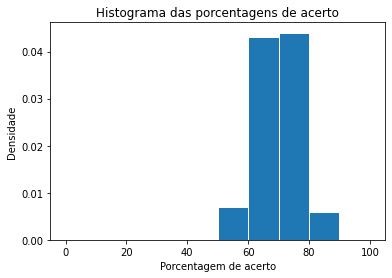

In [14]:
# Plotando um histograma com a porcentagem de acertos:

faixa = np.arange(0,101,10)

plt.hist(acertos,bins=faixa,density=True,edgecolor='white')
plt.xlabel('Porcentagem de acerto')
plt.ylabel('Densidade')
plt.title('Histograma das porcentagens de acerto')
plt.show()

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

✔️ IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords

✔️ CORRIGIU separação de espaços entre palavras e emojis ou entre emojis e emojis

✔️ CRIOU categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante. Pelo menos quatro categorias, com adição de mais tweets na base, conforme enunciado. (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item 6. Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**